In [6]:
import torch
from torch import nn
from d2l import torch as d2l

In [7]:
## Lenet

In [12]:
def init_cnn(module):
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform(module.weight)

class LeNet(d2l.Classifier):
    def __init__(self,lr=0.1,num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6,kernel_size=5,padding=2),nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2,stride=2),
            nn.LazyConv2d(16,kernel_size=5),nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2,stride=2),
            nn.Flatten(),
            nn.LazyLinear(120),nn.Sigmoid(),
            nn.LazyLinear(84),nn.Sigmoid(),
            nn.LazyLinear(num_classes))

In [16]:

class LeNetMAXPOOL(d2l.Classifier):
    def __init__(self,lr=0.1,num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6,kernel_size=5,padding=2),nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.LazyConv2d(16,kernel_size=5),nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.Flatten(),
            nn.LazyLinear(120),nn.Sigmoid(),
            nn.LazyLinear(84),nn.Sigmoid(),
            nn.LazyLinear(num_classes))

In [13]:
@d2l.add_to_class(d2l.Classifier)  #@save
def layer_summary(self, X_shape):
    X = torch.randn(*X_shape)
    for layer in self.net:
        X = layer(X)
        print(layer.__class__.__name__, 'output shape:\t', X.shape)

model = LeNet()
model.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


In [14]:
## Training

In [18]:
trainer = d2l.Trainer(max_epochs=100, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

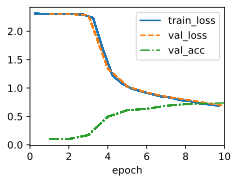

In [17]:

trainer = d2l.Trainer(max_epochs=100, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNetMAXPOOL(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)